In [1]:
################### AA. Call libraries #################

In [2]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler as ss

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from xgboost import plot_importance

# 1.9 Needed for Bayes optimization
from sklearn.model_selection import cross_val_score

from bayes_opt import BayesianOptimization

import eli5
from eli5.sklearn import PermutationImportance

import time
import os
import gc
import random
from scipy.stats import uniform

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
os.chdir("C:\Imp_Docs\Machine Learning\Higgsboson Statoil Lightgbm XGBoost\Exercise-5")
os.listdir()

['wineEquality.py', 'winequalityN.csv']

In [5]:
file = "winequalityN.csv"

In [6]:
data = pd.read_csv(file)

In [7]:
data.isnull().values.any()
data.isnull().sum()
dataset = data.dropna()

dataset.shape                
dataset.columns.values       # 
dataset.dtypes.value_counts()  # 
dataset.isnull().values.any()

False

In [8]:
dataset.head(50)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [9]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
dataset.type.value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [11]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403
sulphates,0.301263,0.225656,0.059070,-0.185616,0.396240,-0.188947,-0.275878,0.260019,0.190864,1.000000,-0.004116,0.039054


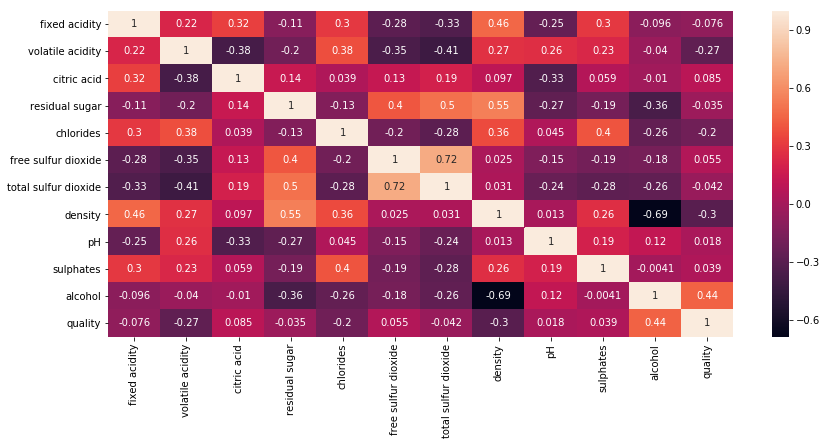

In [12]:
#Plotting Heap Map
corr=dataset.corr()
corr

plt.figure(figsize=(14,6))
g = sns.heatmap(corr,annot=True)

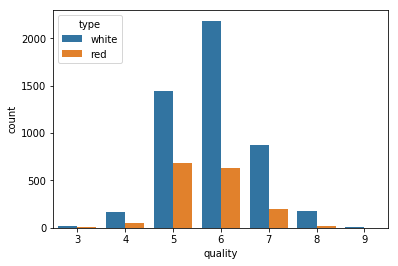

In [13]:
# Plotting the Countplot graph

sns.countplot(x='quality',data=dataset,hue='type')

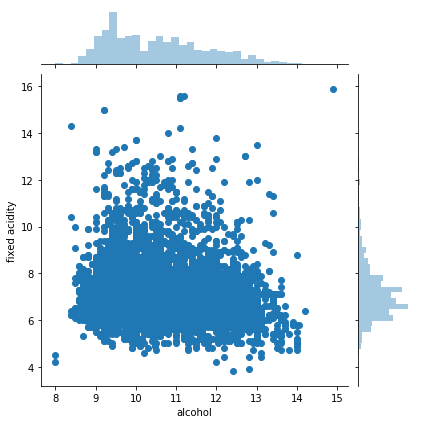

In [14]:
# Plotting the Jointplot graph

sns.jointplot(x='alcohol',y='fixed acidity',data=dataset)

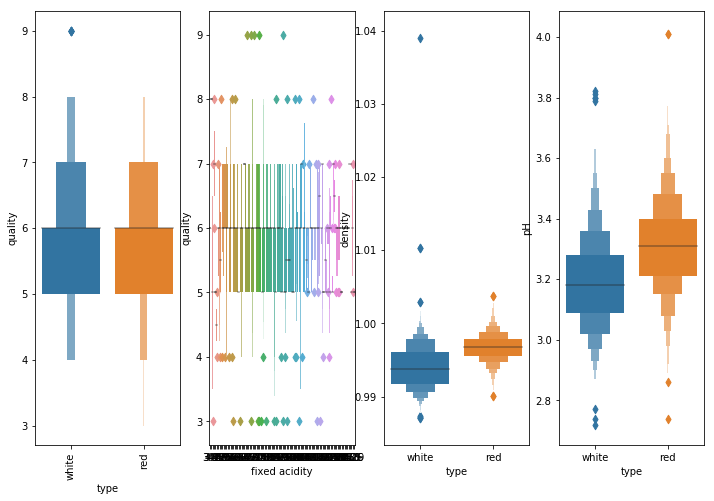

In [15]:
# Plotting the Boxplot Graph

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = 'quality', rotation=90)

sns.boxenplot(x='type',y='quality',data=dataset)
ax1 = fig.add_subplot(1,4,2)
sns.boxenplot(x='fixed acidity',y='quality',data=dataset)
ax1 = fig.add_subplot(1,4,3)
sns.boxenplot(x='type',y='density',data=dataset)
ax1 = fig.add_subplot(1,4,4)
sns.boxenplot(x='type',y='pH',data=dataset)

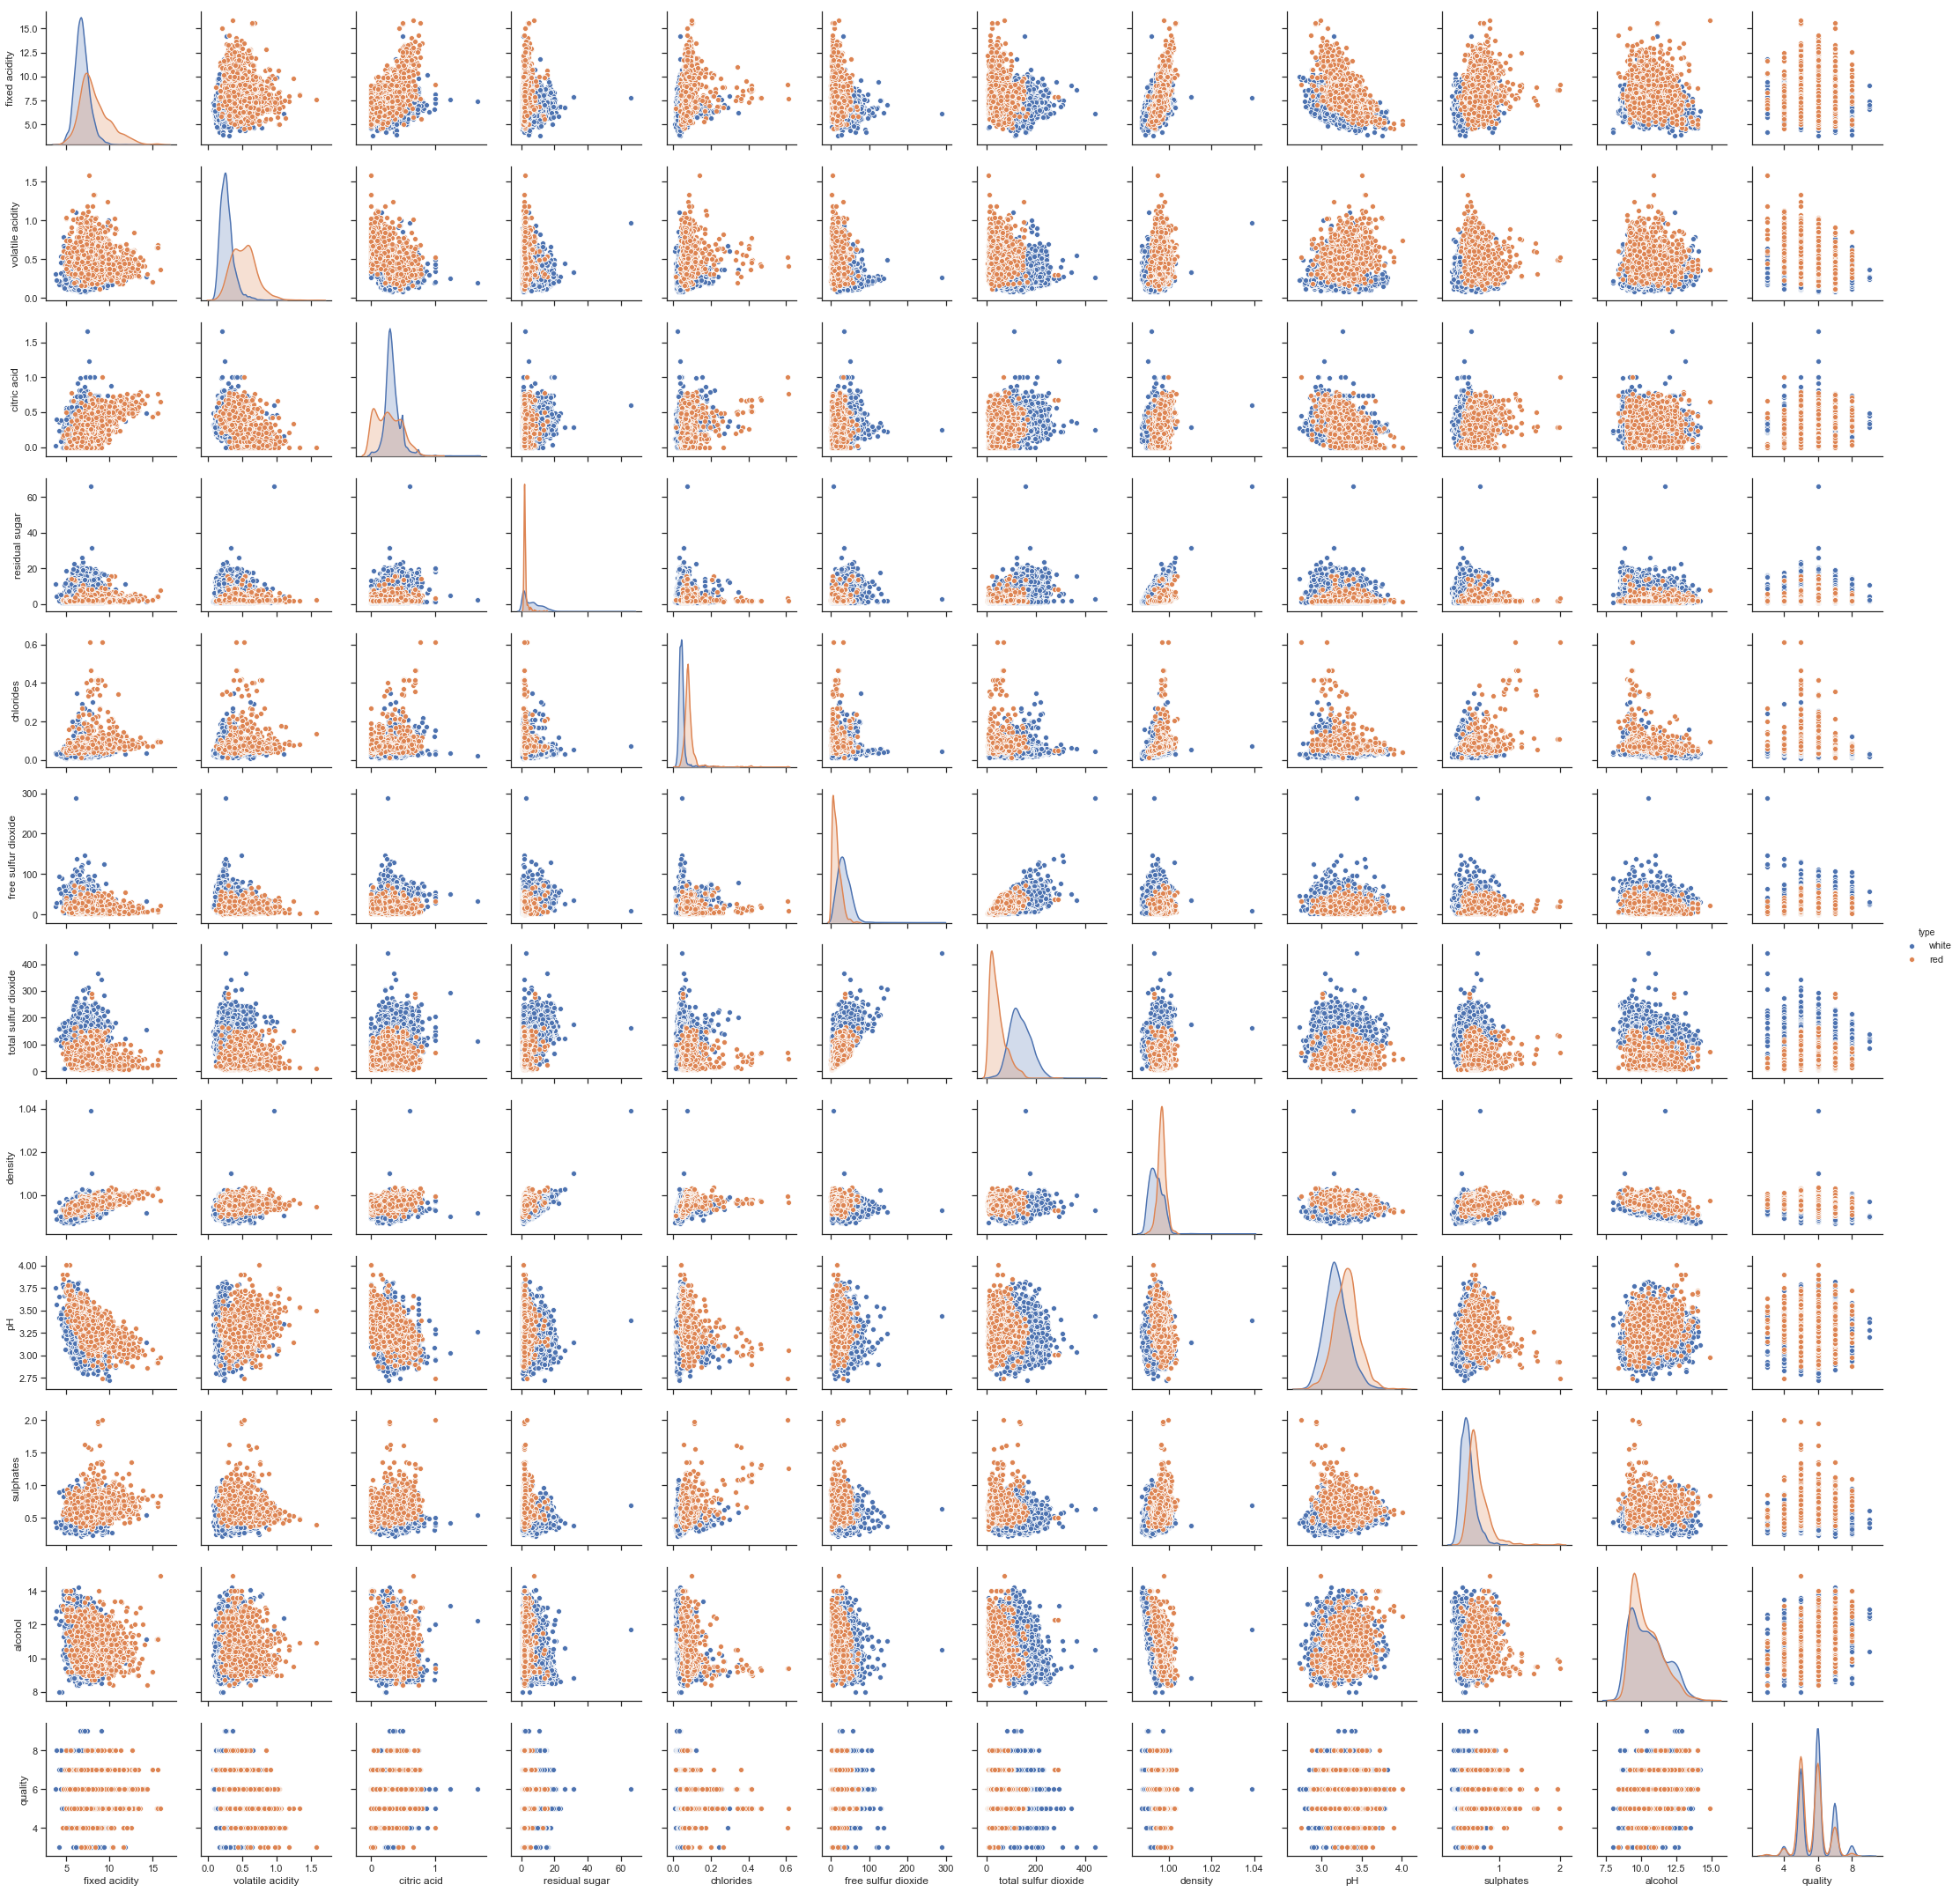

In [16]:
#Plotting in Pair Plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(dataset, hue='type', diag_kind = 'kde')

In [17]:
#  Divide data into predictors and target
#     
X = dataset.iloc[:, 1:13]
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [18]:
y = dataset.iloc[ : , 0]
y.head()

0    white
1    white
2    white
3    white
4    white
Name: type, dtype: object

In [19]:
# Transform label data to '1' and '0'

dataset.type[dataset.type == 'white'] = 1
dataset.type[dataset.type == 'red'] = 0
print(dataset)
y = dataset['type']
y=y.astype('int')
y

C:\Users\Tulika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Tulika\Anaconda3\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Tulika\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, s

     type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0       1            7.0             0.270         0.36           20.70   
1       1            6.3             0.300         0.34            1.60   
2       1            8.1             0.280         0.40            6.90   
3       1            7.2             0.230         0.32            8.50   
4       1            7.2             0.230         0.32            8.50   
5       1            8.1             0.280         0.40            6.90   
6       1            6.2             0.320         0.16            7.00   
7       1            7.0             0.270         0.36           20.70   
8       1            6.3             0.300         0.34            1.60   
9       1            8.1             0.220         0.43            1.50   
10      1            8.1             0.270         0.41            1.45   
11      1            8.6             0.230         0.40            4.20   
12      1            7.9 

C:\Users\Tulika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
       ..
6465    0
6466    0
6467    0
6468    0
6469    0
6470    0
6471    0
6472    0
6473    0
6474    0
6475    0
6476    0
6477    0
6478    0
6479    0
6480    0
6481    0
6482    0
6483    0
6484    0
6485    0
6487    0
6488    0
6489    0
6490    0
6491    0
6492    0
6494    0
6495    0
6496    0
Name: type, Length: 6463, dtype: int32

In [20]:
y.dtype

dtype('int32')

In [21]:
# Store column names somewhere
#     for use in feature importance

column_names = X.columns.tolist()
column_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [22]:
# Split dataset into train and validation parts
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    shuffle = True
                                                    )

In [24]:
X_train.shape

(4524, 12)

In [25]:
X_test.shape

(1939, 12)

In [26]:
y_train.shape

(4524,)

In [27]:
y_test.shape

(1939,)

In [28]:
## Create the Pipeline ##

xg = [('sts', ss() ),
       ('pca', PCA()),
        ('xg',  XGBClassifier(silent = False,
                                  n_jobs=2))]

In [29]:
#  Instantiate Pipeline object
pipe_xg = Pipeline(xg)

In [30]:
# Tune parameters using Grid search
# Hyperparameters to tune and their ranges

parameters = {'xg__learning_rate':  [0.05, 0.4], 
              'xg__n_estimators':   [50,  100],
              'xg__max_depth':      [3,5],
              'pca__n_components' : [5,8]}

In [31]:
clf = GridSearchCV(pipe_xg,   
                   parameters,         
                   n_jobs = 2,    
                   cv =2 ,  
                   verbose =2,
                   scoring = ['accuracy', 'roc_auc'],  
                   refit = 'roc_auc')

In [32]:
## Start fitting data to pipeline ##

start = time.time()
clf.fit(X_train, y_train)
end = time.time()
(end - start)/60 

Fitting 2 folds for each of 16 candidates, totalling 32 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  32 out of  32 | elapsed:   11.2s finished
C:\Users\Tulika\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Tulika\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[17:03:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[17:03:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[17:03:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[17:03:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[17:03:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[17:03:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[17:03:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[17:03:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[17:03:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_

0.19905221859614056

In [33]:
f"Best score: {clf.best_score_} "

'Best score: 0.9953646461185329 '

In [34]:
f"Best parameter set {clf.best_params_}"

"Best parameter set {'pca__n_components': 8, 'xg__learning_rate': 0.05, 'xg__max_depth': 5, 'xg__n_estimators': 100}"

In [35]:
# Make predictions
y_pred = clf.predict(X_test)
y_pred

C:\Users\Tulika\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([1, 1, 1, ..., 0, 0, 1])

In [36]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"

'Accuracy: 98.86539453326458'

<BarContainer object of 4 artists>

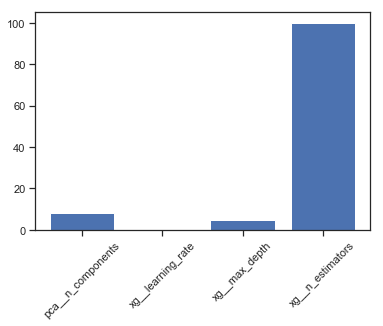

In [38]:
plt.xticks(rotation=45)
plt.bar(clf.best_params_.keys(), clf.best_params_.values())

##################### EE. Randomized Search #################

In [39]:
parameters1 = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,100),
              'xg__max_depth':      range(3,5),
              'pca__n_components' : range(5,7)}

Tune parameters using random search

In [40]:
rs = RandomizedSearchCV(pipe_xg,
                        param_distributions=parameters1,
                        scoring= ['roc_auc', 'accuracy'],
                        n_iter=15,          
                        verbose = 3,
                        refit = 'roc_auc',
                        n_jobs = 2,          # Use parallel cpu threads
                        cv = 2               # No of folds.
                        )

In [41]:
start = time.time()
rs.fit(X_train, y_train)
end = time.time()
(end - start)/60

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    5.3s finished
C:\Users\Tulika\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Tulika\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[17:06:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:06:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:06:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:06:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:06:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:06:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:06:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:06:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:06:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

0.0959327220916748

In [42]:
# Instantiate the importance object
perm = PermutationImportance(
                            rs,
                            random_state=1
                            )

In [43]:
# Fit data & learn
start = time.time()
perm.fit(X_test, y_test)
end = time.time()
(end - start)/60

0.008944892883300781

In [44]:
eli5.show_weights(
                  perm,
                  feature_names = column_names      # X_test.columns.tolist()
                  )

Weight,Feature
0.0104 ± 0.0049,volatile acidity
0.0101 ± 0.0026,total sulfur dioxide
0.0063 ± 0.0026,sulphates
0.0051 ± 0.0016,pH
0.0027 ± 0.0009,chlorides
0.0024 ± 0.0018,citric acid
0.0023 ± 0.0016,free sulfur dioxide
0.0021 ± 0.0004,density
0.0020 ± 0.0012,fixed acidity
0.0015 ± 0.0034,residual sugar


In [45]:
df = eli5.explain_weights_df(
                  perm,
                  feature_names = column_names      # X_test.columns.tolist()
                  )

In [46]:
df

,feature,weight,std
0,volatile acidity,0.010360,0.002457
1,total sulfur dioxide,0.010137,0.001289
2,sulphates,0.006255,0.001289
3,pH,0.005060,0.000802
4,chlorides,0.002690,0.000435
5,citric acid,0.002400,0.000918
6,free sulfur dioxide,0.002330,0.000790
7,density,0.002071,0.000203
8,fixed acidity,0.002002,0.000606
9,residual sugar,0.001531,0.001702


###### Bayesian Optimization ##########

In [47]:
para_set = {
           'learning_rate':  (0.5, 0.9),                 # any value between 0 and 1
           'n_estimators':   (50,100),               # any number between 50 to 300
           'max_depth':      (3,5),                 # any depth between 3 to 10
           'n_components' :  (5,7)                 # any number between 20 to 30
            }

In [48]:
def xg_eval(learning_rate,n_estimators, max_depth,n_components):
    # 12.1 Make pipeline. Pass parameters directly here
    pipe_xg1 = make_pipeline (ss(),                        # Why repeat this here for each evaluation?
                              PCA(n_components=int(round(n_components))),
                              XGBClassifier(
                                           silent = False,
                                           n_jobs=2,
                                           learning_rate=learning_rate,
                                           max_depth=int(round(max_depth)),
                                           n_estimators=int(round(n_estimators))
                                           )
                             )

    # 12.2 Now fit the pipeline and evaluate
    cv_result = cross_val_score(estimator = pipe_xg1,
                                X= X_train,
                                y = y_train,
                                cv = 2,
                                n_jobs = 2,
                                scoring = 'f1'
                                ).mean()             # take the average of all results
    return cv_result

In [49]:
xgBO = BayesianOptimization(
                             xg_eval,     # Function to evaluate performance.
                             para_set     # Parameter set from where parameters will be selected
                             )

In [50]:
xgBO

In [51]:
start = time.time()
xgBO.maximize(init_points=5,    # Number of randomly chosen points to
                                 # sample the target function before
                                 #  fitting the gaussian Process (gp)
                                 #  or gaussian graph
               n_iter=20,        # Total number of times the
               #acq="ucb",       # ucb: upper confidence bound
                                 #   process is to be repeated
                                 # ei: Expected improvement
               # kappa = 1.0     # kappa=1 : prefer exploitation; kappa=10, prefer exploration
#              **gp_params
               )
end = time.time()
(end-start)/60

|   iter    |  target   | learni... | max_depth | n_comp... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.9916   |  0.8409   |  4.394    |  5.02     |  63.0     |
|  2        |  0.9911   |  0.6275   |  4.855    |  6.068    |  71.74    |
|  3        |  0.9913   |  0.8324   |  3.768    |  6.393    |  97.47    |
|  4        |  0.9916   |  0.786    |  4.043    |  5.461    |  80.46    |
|  5        |  0.9926   |  0.8487   |  4.062    |  6.71     |  60.72    |
|  6        |  0.9914   |  0.8626   |  3.323    |  6.938    |  50.01    |
|  7        |  0.992    |  0.6244   |  3.771    |  6.97     |  100.0    |
|  8        |  0.9916   |  0.5012   |  3.025    |  5.748    |  50.0     |
|  9        |  0.9923   |  0.5493   |  3.252    |  6.364    |  99.98    |
|  10       |  0.9913   |  0.518    |  4.508    |  5.069    |  99.98    |
|  11       |  0.992    |  0.8873   |  3.13     |  5.177    |  50.03    |
|  12       |  0.9916   |  0.8041   | 

4.308369561036428

Get values of parameters that maximise the objective

In [52]:
xgBO.res

[{'target': 0.9915595026642984,
  'params': {'learning_rate': 0.8409419841709636,
   'max_depth': 4.393880959311588,
   'n_components': 5.02037204013652,
   'n_estimators': 62.99871085059401}},
 {'target': 0.9911109347477365,
  'params': {'learning_rate': 0.627476546962908,
   'max_depth': 4.854631716285507,
   'n_components': 6.067983929438276,
   'n_estimators': 71.74461998012741}},
 {'target': 0.9912634695085849,
  'params': {'learning_rate': 0.8324094904607713,
   'max_depth': 3.7677706114750107,
   'n_components': 6.392710476832162,
   'n_estimators': 97.46873838010708}},
 {'target': 0.99155739714892,
  'params': {'learning_rate': 0.7860257320335797,
   'max_depth': 4.043269652467415,
   'n_components': 5.46103351376589,
   'n_estimators': 80.46482702826819}},
 {'target': 0.9925930173909323,
  'params': {'learning_rate': 0.8487157906730458,
   'max_depth': 4.062207905033836,
   'n_components': 6.709591525073268,
   'n_estimators': 60.72345936008597}},
 {'target': 0.991409600894942

In [53]:
xgBO.max

{'target': 0.9933399110691519,
 'params': {'learning_rate': 0.7564201035948772,
  'max_depth': 4.15343822780865,
  'n_components': 6.967913850581665,
  'n_estimators': 99.97155817106392}}

In [54]:
for features in xgBO.max.values():
        print(features)

0.9933399110691519
{'learning_rate': 0.7564201035948772, 'max_depth': 4.15343822780865, 'n_components': 6.967913850581665, 'n_estimators': 99.97155817106392}


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

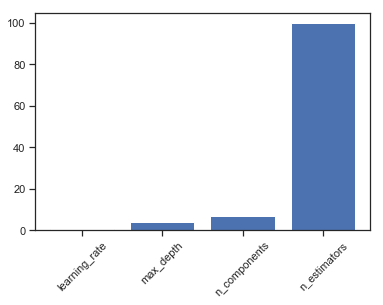

In [55]:
plt.bar(features.keys(), features.values())
plt.xticks(rotation=45)

############### FF. Fitting parameters in our model ##############

In [56]:
# Model with parameters of grid search
model_gs = XGBClassifier(
                    learning_rate = clf.best_params_['xg__learning_rate'],
                    max_depth = clf.best_params_['xg__max_depth'],
                    n_estimators=clf.best_params_['xg__n_estimators']
                    )

In [57]:
#  Model with parameters of random search
model_rs = XGBClassifier(
                    learning_rate = rs.best_params_['xg__learning_rate'],
                    max_depth = rs.best_params_['xg__max_depth'],
                    n_estimators=rs.best_params_['xg__n_estimators']
                    )

In [58]:
#  Model with parameters of Bayesian Optimization
model_bo = XGBClassifier(
                    learning_rate = xgBO.max['params']['learning_rate'],
                    max_depth = int(xgBO.max['params']['max_depth']),
                    n_estimators= int(xgBO.max['params']['n_estimators'])
                    )

In [59]:
start = time.time()
model_gs.fit(X_train, y_train)
model_rs.fit(X_train, y_train)
model_bo.fit(X_train, y_train)
end = time.time()
(end - start)/60

0.018536325295766196

In [60]:
# Predictions with all models
y_pred_gs = model_gs.predict(X_test)
y_pred_rs = model_rs.predict(X_test)
y_pred_bo = model_bo.predict(X_test)

In [61]:
# Accuracy from all models
accuracy_gs = accuracy_score(y_test, y_pred_gs)
accuracy_rs = accuracy_score(y_test, y_pred_rs)
accuracy_bo = accuracy_score(y_test, y_pred_bo)

In [63]:
print("Grid Search Accuracy           = ",accuracy_gs)
print("Random Search Accuracy         = ",accuracy_rs)
print("Bayesian Optimization Accuracy = ",accuracy_bo)

Grid Search Accuracy           =  0.9891696750902527
Random Search Accuracy         =  0.9896854048478597
Bayesian Optimization Accuracy =  0.9938112429087158


Get feature importances from all models

In [66]:
%matplotlib qt5
model_gs.feature_importances_
model_rs.feature_importances_
model_bo.feature_importances_
plot_importance(model_gs)
plot_importance(model_rs)
plot_importance(model_bo)
plt.show()

In [67]:
# Confusion matrix
confusion_matrix( y_test,y_pred_gs)

confusion_matrix(y_test,y_pred_rs)

confusion_matrix(y_test,y_pred_bo)

y_pred_prob_gs = model_gs.predict_proba(X_test)
y_pred_prob_rs = model_rs.predict_proba(X_test)
y_pred_prob_bo = model_bo.predict_proba(X_test)

In [68]:
# calculate fpr, tpr values
fpr_gs, tpr_gs, thresholds = roc_curve(y_test,
                                 y_pred_prob_gs[: , 1],
                                 pos_label= 1
                                 )

fpr_rs, tpr_rs, thresholds = roc_curve(y_test,
                                 y_pred_prob_rs[: , 1],
                                 pos_label= 1
                                 )

fpr_bo, tpr_bo, thresholds = roc_curve(y_test,
                                 y_pred_prob_bo[: , 1],
                                 pos_label= 1
                                 )

In [69]:
# Get probbaility of occurrence of each class
y_pred_prob = clf.predict_proba(X_test)

y_pred_prob.shape      # (34887, 2)
y_pred_prob


# Probability values in y_pred_prob are ordered
#     column-wise, as:
clf.classes_    # array([0, 1]) => Ist col for prob(class = 0)

C:\Users\Tulika\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([0, 1])

In [71]:
# Draw ROC curve
fig = plt.figure(figsize=(12,10))  
ax = fig.add_subplot(111)   # Create axes
#Connect diagonals
ax.plot([0, 1], [0, 1], ls="--")  

#Labels 
ax.set_xlabel('False Positive Rate')  
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')

#Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

#Plot each graph now
ax.plot(fpr_gs, tpr_gs, label = "gs")
ax.plot(fpr_rs, tpr_rs, label = "rs")
ax.plot(fpr_bo, tpr_bo, label = "bo")


#Set legend and show plot
ax.legend(loc="lower right")
plt.show()

In [73]:
## Computing PCA ##

pca = PCA()
principleComp = pca.fit_transform(X)
principleComp.shape
pca.explained_variance_ratio_
X = pca.explained_variance_ratio_.cumsum()
X

array([0.95359466, 0.99417903, 0.99899994, 0.99949535, 0.99984217,
       0.99997834, 0.999987  , 0.99999271, 0.99999685, 0.99999978,
       1.        , 1.        ])